# 1-D Linear Regression 
With practical example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = [] 
Y = [] # Two empty aarays
for line in open("data/data_1d.csv"):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

In [3]:
# let's turm to X and Y into numpy array
X = np.array(X)
Y = np.array(Y)

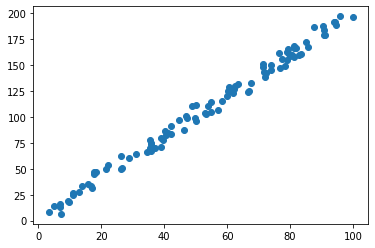

In [4]:
#Plot to see what is looks like
plt.scatter(X, Y)
plt.show()

In [5]:
#from IPython.display import Image

![](image/linear.jpg)
![](image/linear_2.jpg)

In [6]:
# apply the equations we learned to calculate a and b

# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once

denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

In [7]:
# let's calculate the predicted Y
Yhat = a*X + b

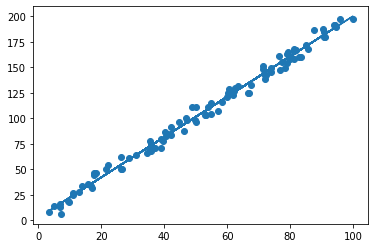

In [8]:
# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()


![title](image/R2.jpg)

In [9]:
# determine how good the model is by computing the r-squared
# R-Square = 1 - SS_residual / SS_total

d1 = Y - Yhat # the difference is still the vector
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9911838202977805


## Introduction to Moore's Law

shows how linear regression analysis can be applied to moore's law

notes for this course can be found at transistor count from: https://en.wikipedia.org/wiki/Transistor_count

In [10]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future
import re

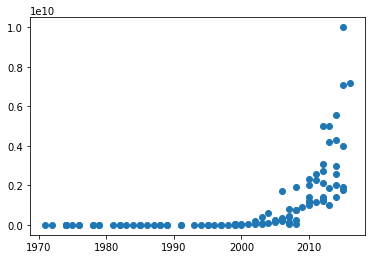

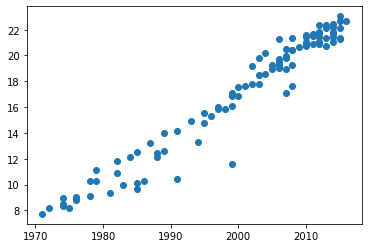

In [11]:
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them

non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)


X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

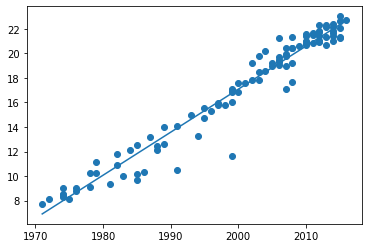

In [12]:
# copied from from above equation
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [13]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576
time to double: 1.9745331723797188 years
